#Data Set Overview

The tutorial uses the Iowa Liquor Retails Sales. We will be using it dataset to predict future sales for one of the stores

This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012.
The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import datetime
import seaborn as sns

In [2]:
import pandas as pd

path =  'Iowa_Liquor_Sales_DEC2023.csv'
liquor_sales_original = pd.read_csv(path)

In [3]:
liquor_sales=liquor_sales_original # use original as a backup

In [4]:
df_rows = liquor_sales.shape[0]

In [5]:
# Check for % of missing values in each column - drop nulls
liquor_sales.isnull().sum()/df_rows*100

Invoice/Item Number       0.000000
Date                      0.000000
Store Number              0.000000
Store Name                0.000000
Address                   0.297443
City                      0.297440
Zip Code                  0.297680
Store Location            8.942255
County Number            13.609866
County                    0.572377
Category                  0.060763
Category Name             0.089638
Vendor Number             0.000032
Vendor Name               0.000025
Item Number               0.000000
Item Description          0.000000
Pack                      0.000000
Bottle Volume (ml)        0.000000
State Bottle Cost         0.000036
State Bottle Retail       0.000036
Bottles Sold              0.000000
Sale (Dollars)            0.000036
Volume Sold (Liters)      0.000000
Volume Sold (Gallons)     0.000000
dtype: float64

In [7]:
liquor_sales = liquor_sales.dropna()

In [8]:
## check for data types and outliers for continuous variables
liquor_sales.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [10]:
liquor_sales['Date'] = pd.to_datetime(liquor_sales['Date'])
#liquor_sales.drop('date',axis=1)

In [11]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt


In [13]:
liquor_sales.describe()

,Date,Store Number,County Number,Category,Vendor Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,21801451,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07,2.180145e+07
mean,2017-07-05 01:53:35.503646720,3.807081e+03,5.688864e+01,1.048797e+06,2.657074e+02,1.222144e+01,8.945343e+02,1.021552e+01,1.533542e+01,1.068085e+01,1.411801e+02,9.243772e+00,2.439779e+00
min,2012-01-03 00:00:00,2.106000e+03,1.000000e+00,1.011000e+06,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2014-11-25 00:00:00,2.624000e+03,3.100000e+01,1.012200e+06,1.150000e+02,6.000000e+00,7.500000e+02,5.510000e+00,8.270000e+00,3.000000e+00,3.306000e+01,1.500000e+00,4.000000e-01
50%,2017-08-25 00:00:00,3.866000e+03,6.100000e+01,1.031200e+06,2.600000e+02,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.416000e+01,4.800000e+00,1.270000e+00
75%,2020-03-16 00:00:00,4.654000e+03,7.700000e+01,1.062400e+06,3.890000e+02,1.200000e+01,1.000000e+03,1.250000e+01,1.875000e+01,1.200000e+01,1.470600e+02,1.050000e+01,2.770000e+00
max,2022-07-15 00:00:00,9.946000e+03,9.900000e+01,1.901200e+06,9.870000e+02,3.360000e+02,3.780000e+05,7.680000e+03,1.152000e+04,1.500000e+04,2.795573e+05,1.500000e+04,3.962580e+03
std,NaN,1.087820e+03,2.746115e+01,7.714059e+04,1.414930e+02,7.716192e+00,6.488901e+02,1.082223e+01,1.623253e+01,3.011101e+01,5.015226e+02,3.610281e+01,9.537436e+00


In [16]:
daily_sale=liquor_sales.groupby('Date')[["Sale (Dollars)"]].sum().sort_values(by = ["Sale (Dollars)"], \
                                                                                ascending=False).reset_index()

daily_sale=daily_sale.sort_values('Date')
daily_sale.head(5)

,Date,Sale (Dollars)
2168,2012-01-03,920756.17
2311,2012-01-04,803626.03
2266,2012-01-05,846667.69
2247,2012-01-09,869108.01
2292,2012-01-10,819375.31


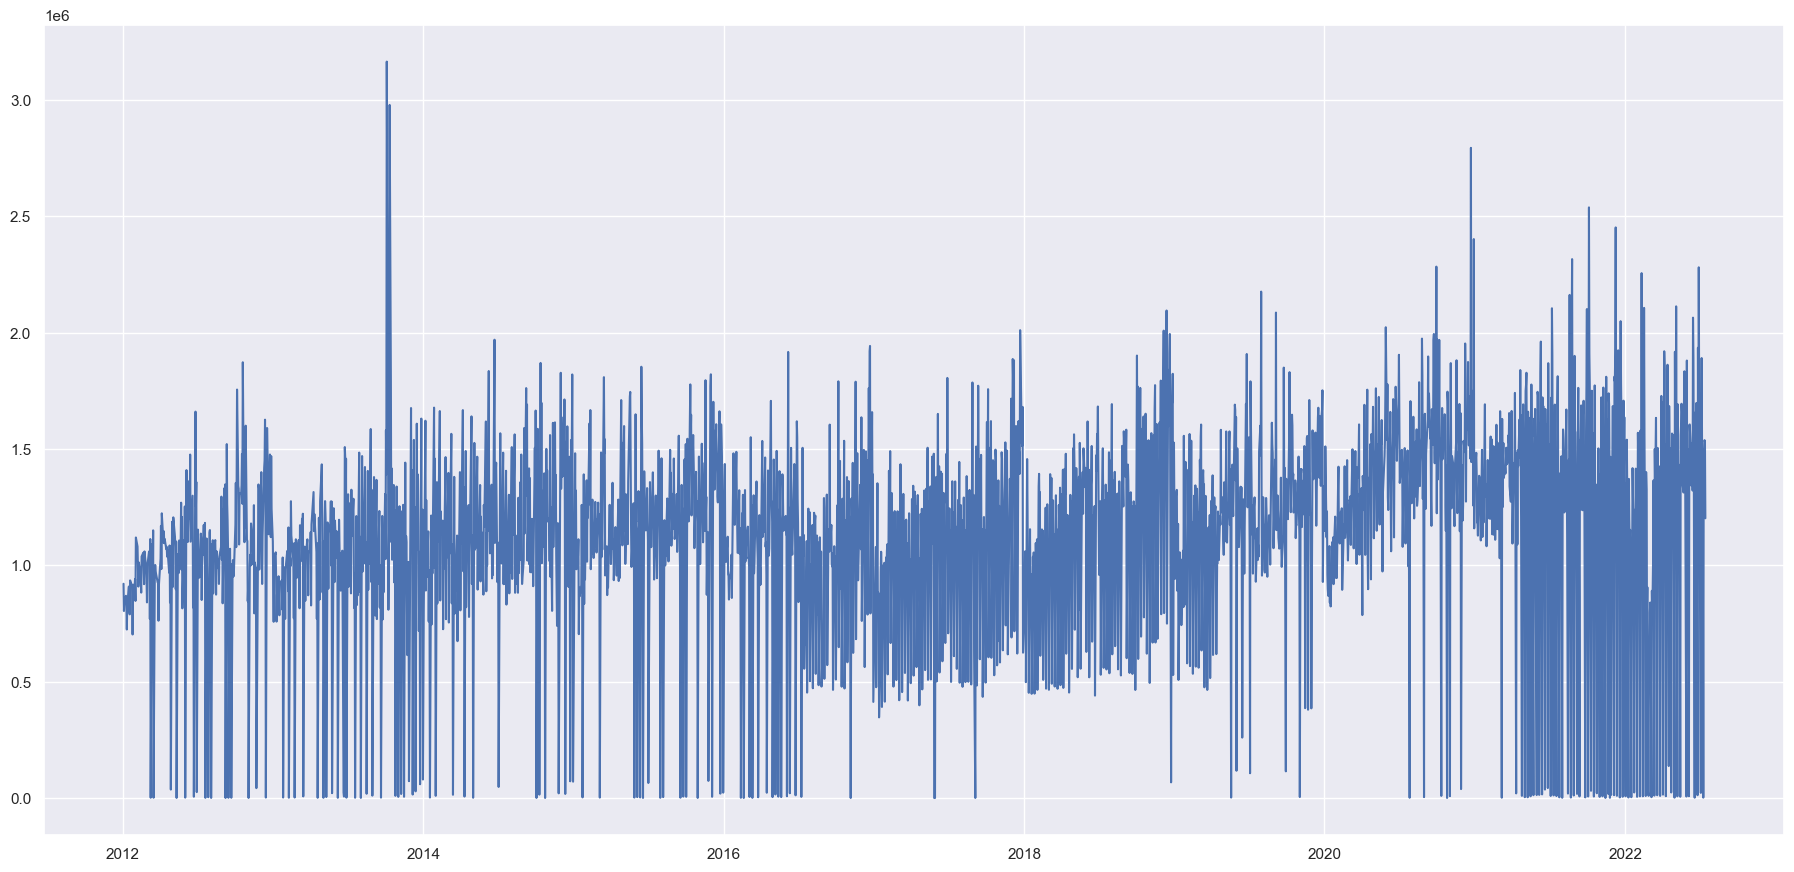

In [18]:
plt.figure(figsize=(20,10))
plt.plot(daily_sale['Date'],daily_sale["Sale (Dollars)"])
plt.show()

In [19]:
liquor_sales.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,S03381400069,2012-01-03,3354,SAM'S CLUB 8238 / DAVENPORT,3845 ELMORE AVE.,DAVENPORT,52807,POINT (-90.527081 41.559731),82.0,SCOTT,...,66936,GRANGALA TRIPLE ORANGE LIQUEUR,12,750,10.99,16.49,36,593.64,27.0,7.13
2,S03384600026,2012-01-03,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77.0,POLK,...,11297,CROWN ROYAL CANADIAN WHISKY,12,1000,17.46,26.19,24,628.56,24.0,6.34
3,S03391400005,2012-01-03,4272,FAREWAY STORES #407 / ESTERVILLE,1108 CENTRAL AVE,ESTHERVILLE,51334,POINT (-94.829963 43.402096),32.0,EMMET,...,8828,LAUDER'S,6,1750,11.18,16.76,6,100.56,10.5,2.77
4,S03410300009,2012-01-03,3495,GREAT PASTIMES,228 N MAIN ST,MONTICELLO,52310,POINT (-91.183413 42.24013200000001),53.0,JONES,...,11786,BLACK VELVET TRAVELER,12,750,4.83,7.44,12,89.28,9.0,2.38
5,S03409700081,2012-01-03,2534,HY-VEE DRUGTOWN / URBANDALE,8601 DOUGLAS,URBANDALE,50322,POINT (-93.737447 41.62941),77.0,POLK,...,45246,PARAMOUNT GOLD RUM,12,750,3.85,5.77,6,34.62,4.5,1.19


In [20]:
liquor_sales.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

# Finding sales for all Wal-Mart Stores

In [23]:
s = set(liquor_sales['Store Name'])
s

{'KUM & GO #542 / URBANDALE',
 "CASEY'S GENERAL STORE #1126 / WYOMING",
 'WALGREENS #03875 / CEDAR RAPIDS',
 'TYCOGA VINEYARD & WINERY',
 'KUM & GO #113 / AMES',
 'BROOKLYN GROCERY LIQUOR LLC',
 "JIM'S FOOD   /  SULLIVAN AVE",
 "CASEY'S GENERAL STORE #1605 / HAMPTON",
 'GIT-N-GO #47 / ALTOONA',
 'FAREWAY STORES #077 / NORWALK',
 'KC BROTHERS',
 'NODAWAY VALLEY MARKET',
 'KUM & GO #24  PLEASANT HILL',
 'METRO LIQUOR AND TOBACCO',
 'FAREWAY STORES #940 / ATLANTIC',
 'KUM & GO #240 / NORTH AVE NORWALK',
 "CASEY'S GENERAL STORE #1388 / SULLY",
 "CASEY'S GENERAL STORE #2915 / BELLEVUE",
 "CASEY'S GENERAL STORE #2778 / CEDAR",
 "CASEY'S GENERAL STORE # 1896/ CLEAR LAKE",
 'NEW PIONEER FOOD CO-OP / IOWA CITY',
 'THE LIQUOR STORE',
 "CASEY'S GENERAL STORE # 2560/ AMES",
 'NEW STAR HUDSON MART',
 'HARTIG DRUG COMPANY #8 / UNIVERSITY',
 'PIT LANE CONVENIENCE STORES',
 'WALGREENS #05239 / DAVENPORT',
 'HY-VEE FOOD STORE / CORYDON',
 'SPIRITS LIQUOR / GRIMES',
 'FAREWAY STORES #384 / BOONE',
 "CAS

In [39]:
wmt_list=[]
for i in set(liquor_sales['Store Name']):
  if 'WAL-MART' in i:
    wmt_list.append(i)

len(wmt_list)

57

In [40]:
wmt_stores_only = liquor_sales[liquor_sales['Store Name'].isin(wmt_list)]
wmt_stores_only.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
15,S03383200007,2012-01-03,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655,POINT (-91.158407 40.813125),29.0,DES MOINES,...,25606,SEAGRAMS 7 CROWN BL WHISKEY,12,750,6.14,9.21,12,110.52,9.0,2.38
19,S03383700033,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,82606,DEKUYPER SOUR APPLE PUCKER,12,750,6.30,9.45,12,113.40,9.0,2.38
31,S03383600030,2012-01-03,3886,WAL-MART 0646 / ANAMOSA,101 115 ST,ANAMOSA,52205,POINT (-91.26496500000002 42.101677),53.0,JONES,...,13038,CANADIAN RESERVE WHISKY,6,1750,8.77,13.16,6,78.96,10.5,2.77
72,S03383700001,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,11296,CROWN ROYAL,12,750,14.25,21.37,12,256.44,9.0,2.38
82,S03408000009,2012-01-03,3622,WAL-MART 1415 / SPIRIT LAKE,2600 HWY 71,SPIRIT LAKE,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,11788,BLACK VELVET,6,1750,10.45,15.67,24,376.08,42.0,11.10


In [41]:
locations=set(wmt_stores_only['Store Location'])

In [42]:
def long(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace('(',"")
    k=i.split()
    l.append(float(k[0]))
  return l
    



In [43]:
def lat(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace(')',"")
    k=i.split()
    l.append(float(k[1]))
  return l

In [44]:
wmt_stores_only['Lat']= lat(wmt_stores_only['Store Location'].values)
wmt_stores_only['Lon']= long(wmt_stores_only['Store Location'].values)


In [45]:
wmt_locations=wmt_stores_only[['Store Number','Lat','Lon']].drop_duplicates()

In [46]:
wmt_store_sales = wmt_stores_only.groupby('Store Number')[['Sale (Dollars)']].sum().sort_values(by = ['Sale (Dollars)'], \
                                                                                ascending=False).reset_index()


In [47]:
wmt_store_sales=pd.merge(wmt_store_sales,wmt_locations , how='left', on='Store Number')

In [48]:
wmt_store_sales.head(5)

,Store Number,Sale (Dollars),Lat,Lon
0,3644,6547108.52,41.644195,-93.505276
1,3644,6547108.52,41.644194,-93.504802
2,3769,5997594.61,42.485042,-92.440394
3,3769,5997594.61,42.485038,-92.440035
4,3562,5974891.78,40.813125,-91.158407


# Showing Geo-Location 
The code for this section was taken from :https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb#scrollTo=7R8Bx_Zmb0cM

In [49]:
# Extract the data we're interested in
lat = wmt_store_sales['Lat'].values
lon = wmt_store_sales['Lon'].values
sales = wmt_store_sales['Sale (Dollars)'].values
#area = cities['area_total_km2'].values

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


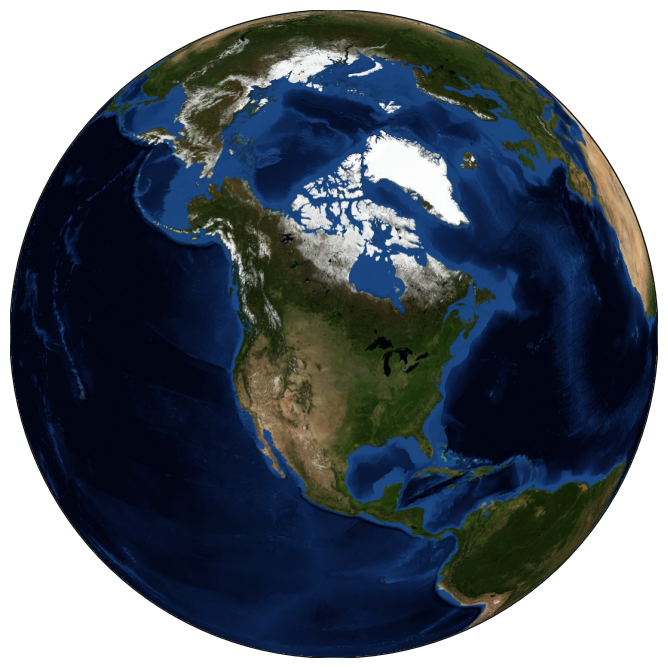

In [52]:

plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

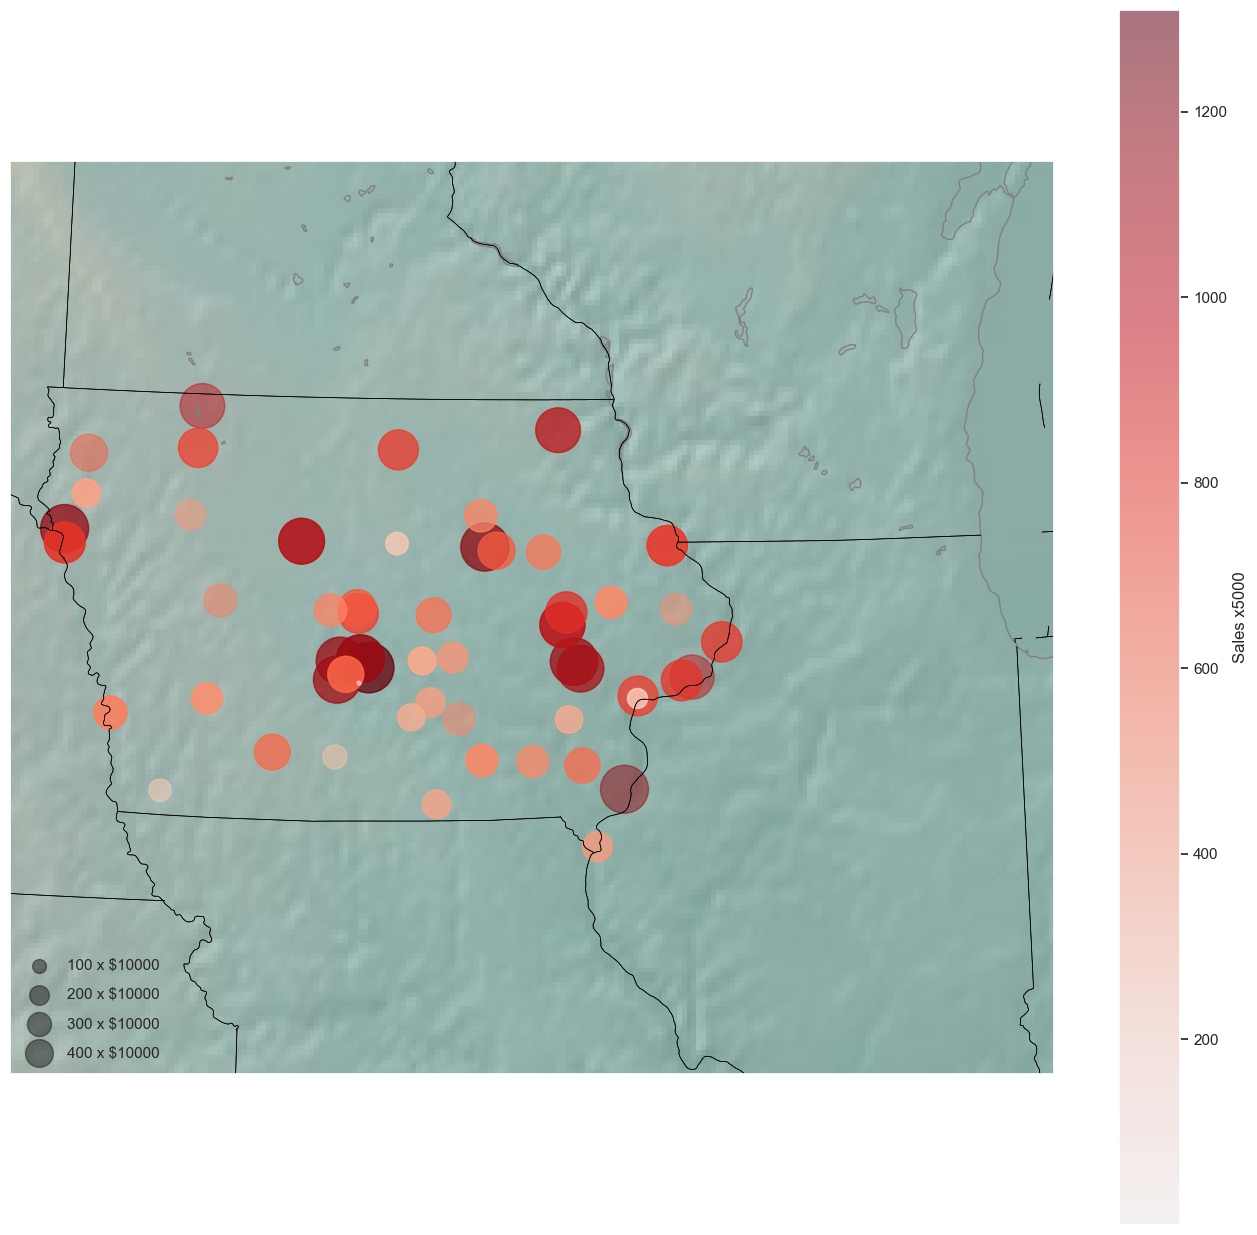

In [56]:
# 1. Draw the map background
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='lcc', resolution='f', #40.6331° N, 89.3985° W
            lat_0=42, lon_0=-92,
            width=8E5, height=7E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=sales/5000,s=sales/5000,cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Sales x5000')
plt.clim(min(sales/5000), max(sales/5000))

# make legend with dummy points
for a in [100,200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' x $10000')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

# Exploratory Data Analysis
### Top 5 categories of liquor by total sales

Credit: Batool Fatima
https://www.linkedin.com/in/batoolfatima1/

In [57]:
liquor_sales=wmt_stores_only

In [58]:
liquor_sales['Category Name'] = liquor_sales['Category Name'].str.lower().str.title()

In [60]:
categories = pd.DataFrame(liquor_sales[['Category Name','Sale (Dollars)']])
Top_categories = categories.groupby('Category Name')[['Sale (Dollars)']].sum().sort_values(by = ['Sale (Dollars)'], \
                                                                                ascending=False).reset_index()

In [61]:
Top_categories.shape

(83, 2)

In [62]:
Top_categories.head()

,Category Name,Sale (Dollars)
0,Canadian Whiskies,23375616.46
1,American Vodkas,18269860.37
2,Spiced Rum,16687302.49
3,Vodka 80 Proof,11700980.30
4,Straight Bourbon Whiskies,11072848.93


In [63]:
categories_sales = Top_categories.head(10)
categories_sales

,Category Name,Sale (Dollars)
0,Canadian Whiskies,23375616.46
1,American Vodkas,18269860.37
2,Spiced Rum,16687302.49
3,Vodka 80 Proof,11700980.30
4,Straight Bourbon Whiskies,11072848.93
5,Tennessee Whiskies,10347196.21
6,Imported Vodkas,8894160.69
7,Whiskey Liqueur,7294587.03
8,Cream Liqueurs,7069021.08
9,Blended Whiskies,6241246.56


# Exploratory Data Analysis - Part 2


### Top Selling 10 categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canadian Whiskies'),
  Text(1, 0, 'American Vodkas'),
  Text(2, 0, 'Spiced Rum'),
  Text(3, 0, 'Vodka 80 Proof'),
  Text(4, 0, 'Straight Bourbon Whiskies'),
  Text(5, 0, 'Tennessee Whiskies'),
  Text(6, 0, 'Imported Vodkas'),
  Text(7, 0, 'Whiskey Liqueur'),
  Text(8, 0, 'Cream Liqueurs'),
  Text(9, 0, 'Blended Whiskies')])

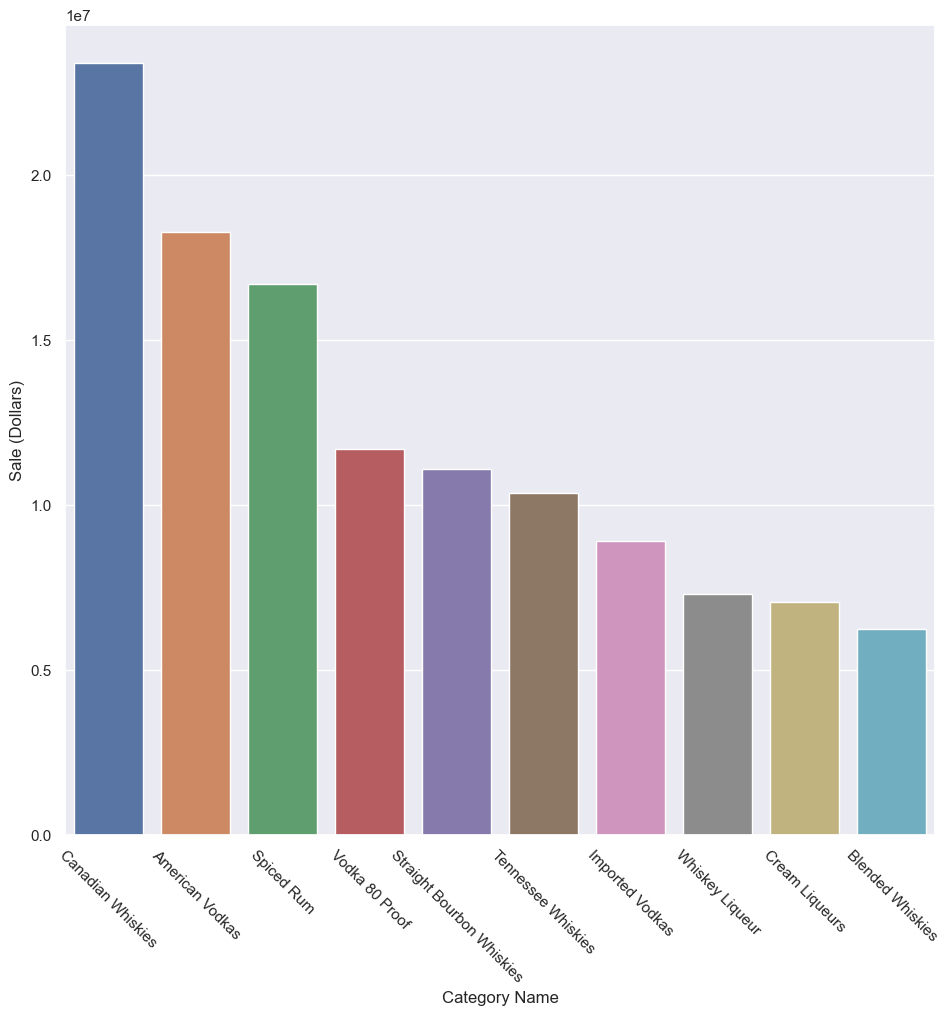

In [65]:
# bar chart for total sales for each category
plt.figure(figsize=(10,10))
sns.barplot(x= 'Category Name', y = 'Sale (Dollars)', data=categories_sales)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Daily Sales

In [66]:
liquor_sales['year'] = pd.DatetimeIndex(liquor_sales['Date']).year
liquor_sales['month'] = pd.DatetimeIndex(liquor_sales['Date']).month
liquor_sales['day'] = pd.DatetimeIndex(liquor_sales['Date']).day_name()

In [67]:
daily_sales = liquor_sales.groupby('day')[['Sale (Dollars)']].sum().sort_values(by = ['day']).reset_index()
#daily_sales

In [68]:
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

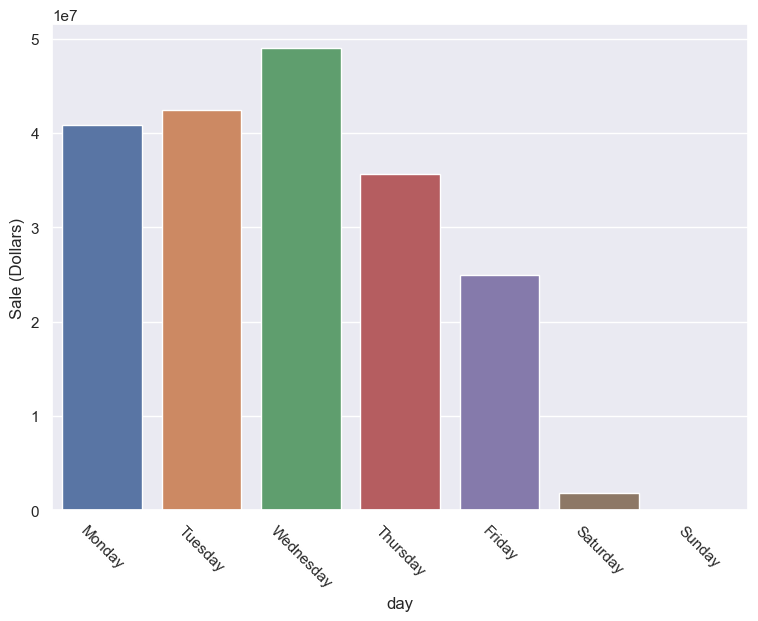

In [70]:
# bar chart for total sales for each category
plt.figure(figsize=(8,6))
sns.barplot(x= 'day', y = 'Sale (Dollars)', data=daily_sales, order = daysofweek)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Yearly trend of liquor categories

In [71]:
yearly_data = pd.DataFrame(liquor_sales[liquor_sales['Category Name'].isin(['Canadian Whiskies', 'American Vodkas', \
                                                                            'Spiced Rum','Straight Bourbon Whiskies', \
                                                                            'Tennessee Whiskies'])])

x = yearly_data.groupby(['year', 'Category Name'])['Sale (Dollars)'].sum().reset_index()


(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

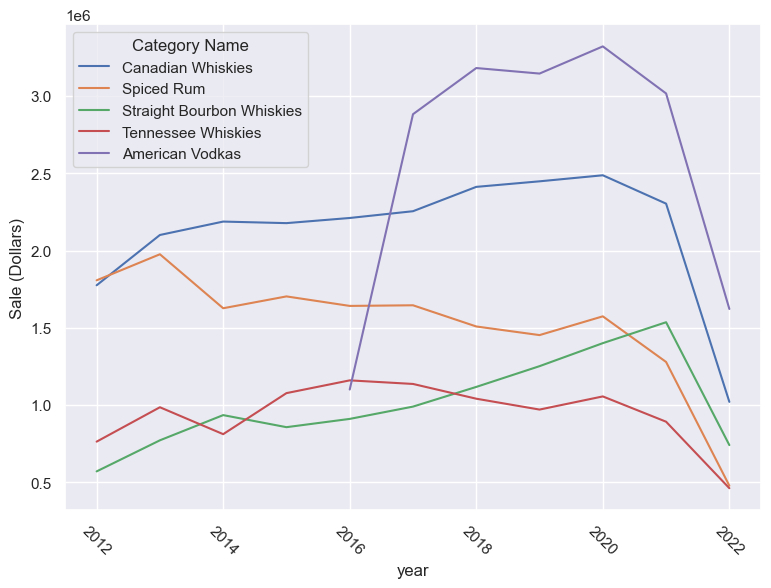

In [72]:
plt.figure(figsize=(8,6))
sns.lineplot(x= 'year', y = 'Sale (Dollars)', data=x, hue='Category Name')
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Drill deeper into the top selling categories - Canadian Whiskey

In [73]:
Can_whiskies_items = liquor_sales[liquor_sales['Category Name'] == 'Canadian Whiskies']

In [74]:
Can_whiskies_items['Item Description'] = Can_whiskies_items['Item Description'].str.lower().str.title()

In [75]:
Can_whiskies_items.groupby(['Item Description'])[['Bottles Sold', 'Sale (Dollars)']]\
.sum().sort_values(by = ['Bottles Sold', 'Sale (Dollars)'], ascending = False).reset_index().head(5)

,Item Description,Bottles Sold,Sale (Dollars)
0,Black Velvet,681133,8904634.23
1,Crown Royal,149617,3775056.37
2,Crown Royal Regal Apple,97554,2486356.37
3,Canadian Ltd Whisky,86313,1101508.97
4,Windsor Canadian Pet,64009,891558.84


In [76]:
Top_Whisky_items = pd.DataFrame(Can_whiskies_items[Can_whiskies_items['Item Description'].isin\
                                      (['Black Velvet', 'Crown Royal', 'Black Velvet Toasted Caramel',\
                                      'Canadian Ltd Whisky','Crown Royal Regal Apple'])])

Top_Whisky_items1 = Top_Whisky_items.groupby(['Item Description', 'year'])[['Bottles Sold', 'Sale (Dollars)']]\
.sum().sort_values(by = ['Item Description', 'year', 'Bottles Sold']).reset_index()
#Top_Whisky_items

In [77]:
len(Top_Whisky_items)

66500

## bottles_sold for Top 5 Canadian Whisky Items

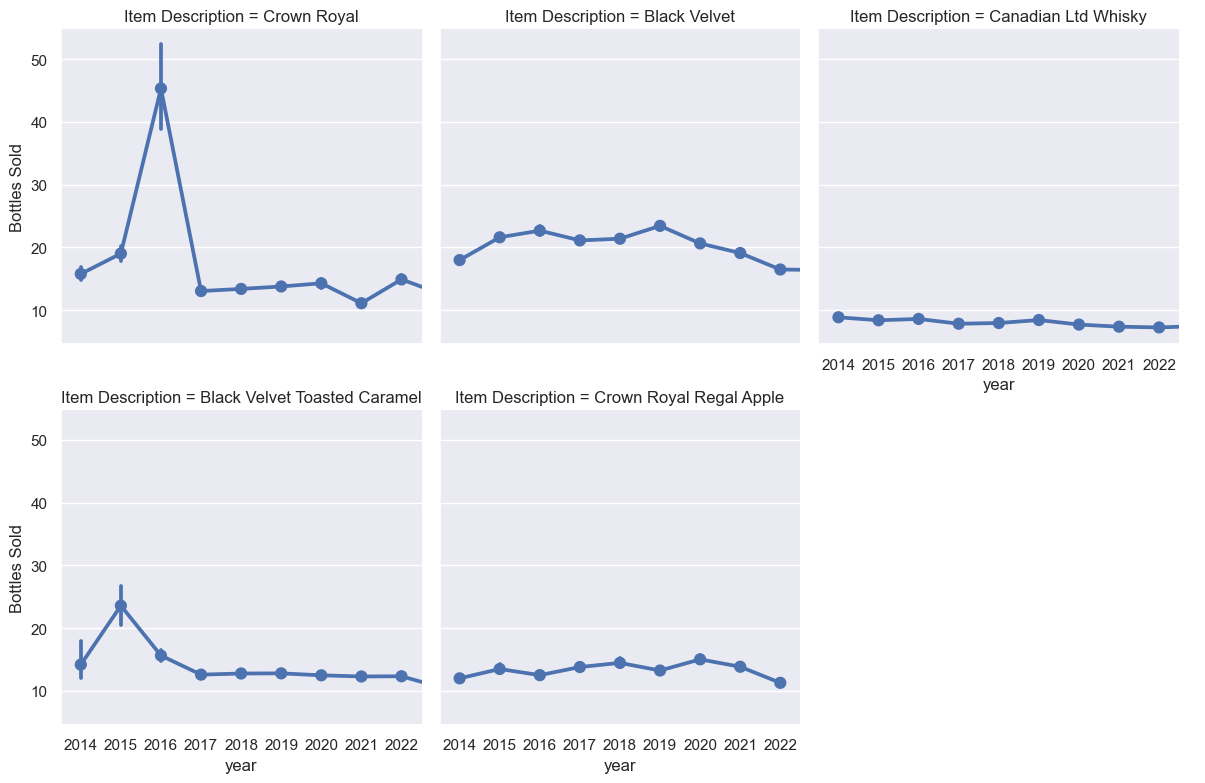

In [79]:
g = sns.FacetGrid(Top_Whisky_items, col="Item Description", col_wrap = 3, height=4)
g.map(sns.pointplot, "year", "Bottles Sold")
g.add_legend();

## Sales for Top 5 Canadian Whisky Items

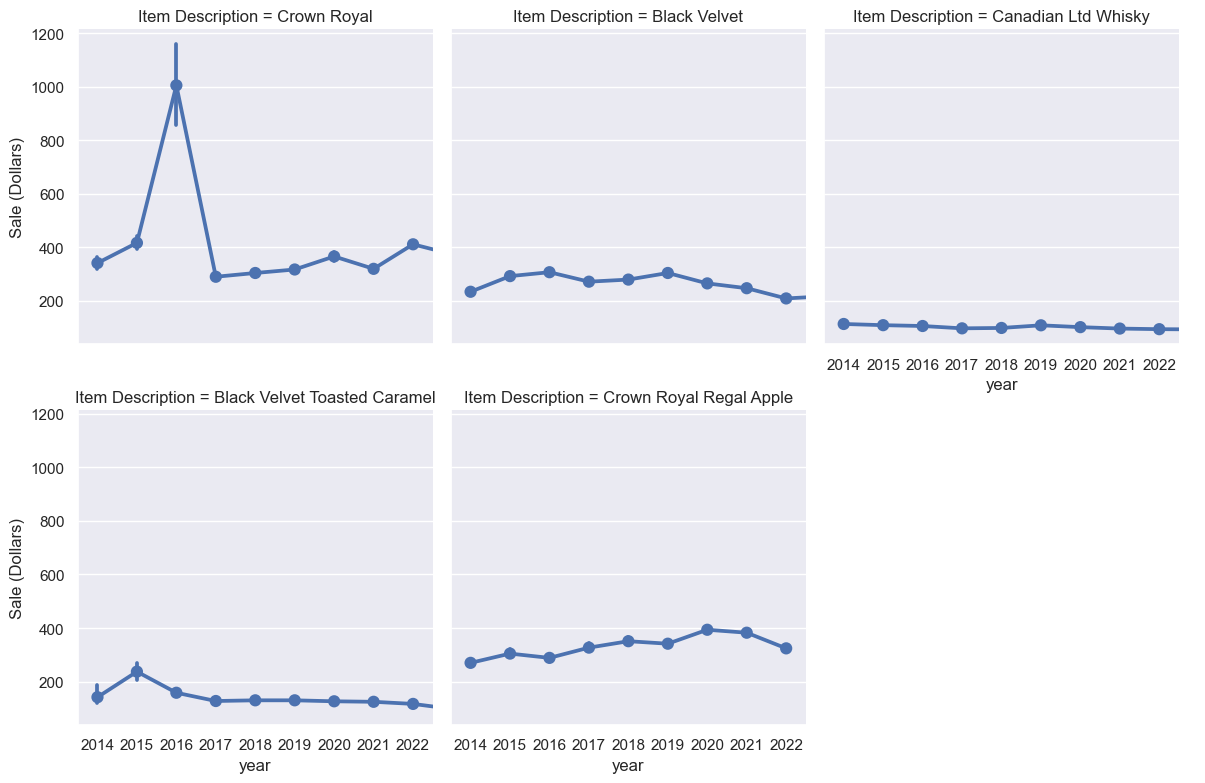

In [81]:
b = sns.FacetGrid(Top_Whisky_items, col="Item Description", col_wrap = 3, height=4)
b.map(sns.pointplot, "year", "Sale (Dollars)")
b.add_legend();

## Average Markup for Canadian Whisky Items


In [82]:
Top_Whisky_items

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Lat,Lon,year,month,day
72,S03383700001,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,21.37,12,256.44,9.0,2.38,42.048690,-90.662920,2012,1,Tuesday
82,S03408000009,2012-01-03,3622,WAL-MART 1415 / SPIRIT LAKE,2600 HWY 71,SPIRIT LAKE,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,15.67,24,376.08,42.0,11.10,43.416452,-95.126535,2012,1,Tuesday
1299,S03408000010,2012-01-03,3622,WAL-MART 1415 / SPIRIT LAKE,2600 HWY 71,SPIRIT LAKE,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,13.49,12,161.88,21.0,5.55,43.416452,-95.126535,2012,1,Tuesday
1943,S03383700024,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,5.87,12,70.44,9.0,2.38,42.048690,-90.662920,2012,1,Tuesday
2366,S03389600002,2012-01-03,3632,WAL-MART 2004 / DUBUQUE,4200 DODGE ST,DUBUQUE,52003,POINT (-90.736955 42.489041),31.0,DUBUQUE,...,15.67,6,94.02,10.5,2.77,42.489041,-90.736955,2012,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24288117,INV-49239200006,2022-07-15,3886,WAL-MART 0646 / ANAMOSA,101 115 ST,ANAMOSA,52205.0,POINT (-91.264951 42.10167),53.0,JONES,...,15.68,12,188.16,21.0,5.54,42.101670,-91.264951,2022,7,Friday
24288955,INV-49253300028,2022-07-15,3721,WAL-MART 0913 / DECORAH,1798 OLD STAGE RD,DECORAH,52101.0,POINT (-91.752933 43.290185),96.0,WINNESHIEK,...,50.99,6,305.94,10.5,2.77,43.290185,-91.752933,2022,7,Friday
24289396,INV-49264300016,2022-07-15,3726,WAL-MART 1285 / OTTUMWA,1940 VENTURE DR,OTTUMWA,52501.0,POINT (-92.457026 41.014512),90.0,WAPELLO,...,26.24,12,314.88,9.0,2.37,41.014512,-92.457026,2022,7,Friday
24289423,INV-49225800022,2022-07-15,3833,WAL-MART 3394 / ATLANTIC,1905 EAST 7TH ST,ATLANTIC,50022.0,POINT (-94.986241 41.403855),15.0,CASS,...,15.68,6,94.08,10.5,2.77,41.403855,-94.986241,2022,7,Friday


In [83]:
Top_Whisky_items['Average Markup'] = ((Top_Whisky_items['State Bottle Retail'] -    \
                                       Top_Whisky_items['State Bottle Cost'])/Top_Whisky_items['Bottles Sold'])/(Top_Whisky_items['State Bottle Cost']/Top_Whisky_items['Bottles Sold'])

In [84]:
Top_Whisky_items.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Lat,Lon,year,month,day,Average Markup
72,S03383700001,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,12,256.44,9.0,2.38,42.048690,-90.662920,2012,1,Tuesday,0.499649
82,S03408000009,2012-01-03,3622,WAL-MART 1415 / SPIRIT LAKE,2600 HWY 71,SPIRIT LAKE,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,24,376.08,42.0,11.10,43.416452,-95.126535,2012,1,Tuesday,0.499522
1299,S03408000010,2012-01-03,3622,WAL-MART 1415 / SPIRIT LAKE,2600 HWY 71,SPIRIT LAKE,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,12,161.88,21.0,5.55,43.416452,-95.126535,2012,1,Tuesday,0.500556
1943,S03383700024,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,12,70.44,9.0,2.38,42.048690,-90.662920,2012,1,Tuesday,0.565333
2366,S03389600002,2012-01-03,3632,WAL-MART 2004 / DUBUQUE,4200 DODGE ST,DUBUQUE,52003,POINT (-90.736955 42.489041),31.0,DUBUQUE,...,6,94.02,10.5,2.77,42.489041,-90.736955,2012,1,Tuesday,0.499522


In [85]:
Top_Whisky_Markup = Top_Whisky_items.groupby(['Item Description'])[['Average Markup']]\
.sum().sort_values(by = ['Average Markup'], ascending = False).reset_index()

Top_Whisky_Markup

,Item Description,Average Markup
0,Black Velvet,17254.692007
1,Canadian Ltd Whisky,5567.596219
2,Crown Royal,4970.698440
3,Crown Royal Regal Apple,3574.052174
4,Black Velvet Toasted Caramel,2293.011916


In [87]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.7.2
mpl_toolkits        NA
numpy               1.26.0
pandas              2.0.3
seaborn             0.12.2
session_info        1.0.0
statsmodels         0.14.1
-----
IPython             8.15.0
jupyter_client      8.1.0
jupyter_core        5.3.0
-----
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
-----
Session information updated at 2024-03-20 08:50
